# ASHRAE Irradiance sample calculation

In [9]:
import numpy as np
import pandas as pd
import hvplot.pandas

import matplotlib.pyplot as plt

ASHRAE provides a formula for calculating the irradiance at the surface on a plane that is perpendicular to the incoming solar radiation. This equation is:

$$ I_B = A e^{-Km} $$

where

$$ A = 1160 + 75 sin[360(n - 275)/365] $$

$$ K = 0.174 + 0.035 sin[360(n - 100)/365] $$

$$ m = 1/ sin(\beta) $$

$$ \beta = 90 - Latitude + Declination $$

$$ Declination = \delta = 23.45 sin[360/365 (n - 81)] $$

and n is the day number (e.g., May 1 = 31 + 28 + 31 + 30 + 1 = 121). A is the irradiance (W m-2), K is the attenuation per air mass, and m is the air mass.

In [2]:
def declination(day):
    d = -23.44 * np.cos( (2.*np.pi) / 365.25 * (day + 10) )   # Approximate
    return d

In [ ]:
def declination(day):
    d = 23.44 * np.cos( (2.*np.pi) / 365.25 * (day - 81) )   # Approximate
    return d

In [3]:
def A(n):
    return 1160. + 75.*np.sin(360/365*(n-275)*np.pi/180) # W m-2

In [4]:
def K(n):
    return 0.174 +0.035*np.sin(360/365*(n-100)*np.pi/180) # unitless

In [5]:
def m(latitude, declination):
    return 1. / np.sin((90. - latitude + declination)*np.pi/180)

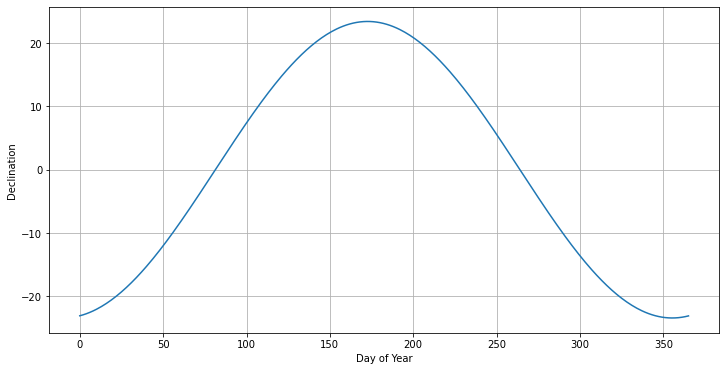

In [12]:
days = np.arange(0,366)
dec = []
for day in days:
    dec.append(declination(day))
dec = np.array(dec)

plt.figure(figsize=(12,6))
plt.plot(days, dec)
plt.grid();
plt.xlabel('Day of Year');
plt.ylabel('Declination');

In [6]:
A(121)

1124.6630369244601

In [7]:
K(121)

0.186378664276173

In [8]:
declination(121)

14.788451200638994

In [9]:
m(46.73, declination(121))

1.1784278038586675

In [11]:
lat = 46.73
day = 121
dec = declination(day)
Ib = A(day) * np.exp(-K(day)*m(lat, dec))
print('The ASHRAE irradiance at the surface is %4.0f W m-2'% Ib)

The ASHRAE irradiance at the surface is  903 W m-2


### Now create an annual cycle of solar radiation

In [14]:
dates = pd.date_range('2023-01-01', '2023-12-31', freq='d')

In [45]:
dec = []
Ib  = []
for date in dates:
    day = int(date.strftime('%-j'))
    dec.append(declination(day))
    Ib.append(A(day) * np.exp(-K(day)*m(lat, dec[-1])))
dec = np.array(dec)
df = pd.DataFrame({'declination': dec, 'irradiance': Ib})
df.index = dates

<AxesSubplot:>

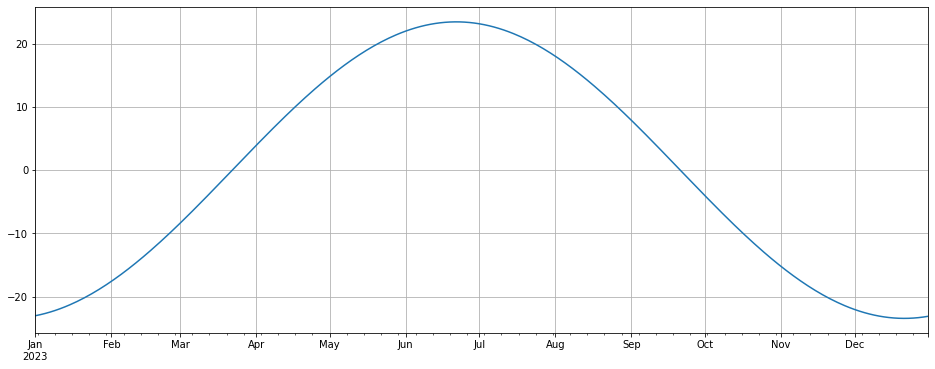

In [46]:
df.declination.plot(figsize=(16,6), grid=True)

<AxesSubplot:>

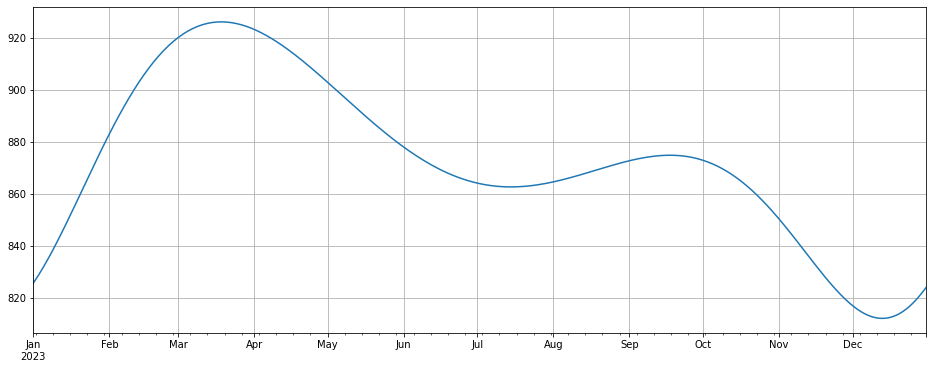

In [47]:
df.irradiance.plot(figsize=(16,6), grid=True)

NOTE THAT this is the solar radiation (in W m-2) on a surface that is always perpendicular to the sunlight. This is quite different from the TOA insolation that we calculated before. See the figures in the [Solar Radiation Calculator](https://www.cableizer.com/blog/post/solar-radiation-calculator/) for another example.